<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Histograma_Final/PSD_histogram_modelo_set_16_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 7.7 MB/s 


In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 203.28 MiB | 28.96 MiB/s, done.
Resolving deltas: 100% (219/219), done.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.23 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)
Img_Size = 28

In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     142  118.606827  134.133896  ...   88.691330   92.896057   93.242020
1     151  162.749786  167.421326  ...    0.623788    0.332398    1.405245
2     133  133.033249  134.778397  ...    0.307479    0.518006    1.498615
3     143    0.646731    1.667710  ...   24.050859   23.304808   25.018631
4     162  133.092514  133.932922  ...  180.855972  187.058670  190.965698
5     143   95.237953   94.233315  ...  184.873199  170.852448  154.543503
6     134   96.420364   94.587448  ...    0.000000    0.104032    1.053019
7     131  109.400909  125.040558  ...    0.997261    1.000000    1.000000
8     101  126.672379  132.543976  ...    0.000000    0.586511    1.000000
9     108  150.599457  151.393677  ...  152.572021  122.731133   81.039780
10    191  111.770920  118.127647  ...  214.572983  217.643936  214.973816
11    111  188.281952  192.990509  ...  144.572205  145.184479  131.731857
12    181  172.136658  19

In [ ]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.24 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 162ms/step - loss: 0.4839 - accuracy: 0.7609 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 132ms/step - loss: 0.2597 - accuracy: 0.8863 - val_loss: 0.6937 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 135ms/step - loss: 0.1646 - accuracy: 0.9504 - val_loss: 0.6950 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1159 - accuracy: 0.9592 - val_loss: 0.6956 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 130ms/step - loss: 0.0651 - accuracy: 0.9767 - val_loss: 0.6975 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 131ms/step - loss: 0.0517 - accuracy: 0.9796 - val_loss: 0.6979 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 132ms/step - loss: 0.0299 - accuracy: 0.9942 - val_loss: 0.7006 - val_accuracy: 0.5102

In [ ]:
Y_test = yback(Y_test)

In [ ]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        20  52
1         0  75


In [ ]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   115.0    0.085369    1.012703  ...    0.737543    1.520151    1.572325
14  183.0   97.252716  101.316254  ...  152.839798  163.009750  136.953903
15  175.0  140.063995  139.724808  ...  177.483200  169.412796  159.147186
24  118.0    1.361965    3.064924  ...   57.721634   83.546394  103.239006
25  194.0  108.462418  128.326385  ...   67.848114   73.981712   70.858322
30  187.0  148.714203  136.653107  ...  139.900146  138.282684  125.662827
33  126.0  145.975311  148.938278  ...  160.024689  161.271606  179.370377
34  113.0  113.879082  114.362595  ...  102.976898  101.992096  127.265808
37  144.0  163.788559  168.153549  ...  144.577179  151.406647  145.686737
41  142.0  183.354691  182.631821  ...  217.006744  201.838928  187.961914
42  155.0  129.126968  122.404549  ...  195.825531  203.731247  201.898819
49  187.0   90.606476   63.991768  ...  140.206207  161.868393  206.757629
0   115.0    0.980265    

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 702, done.
remote: Counting objects: 100% (463/463), done.
remote: Compressing objects: 100% (461/461), done.
remote: Total 702 (delta 292), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (702/702), 5.73 MiB | 12.07 MiB/s, done.
Resolving deltas: 100% (429/429), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
PSD_new.shape

(95, 2)

In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,115.0,0.085369,1.012703,1.855274,1.224499,0.441890,0.215803,1.044461,1.953951,1.094064,0.311456,0.346238,1.128847,1.681663,0.345104,0.463667,0.247713,0.712363,3.916597,17.113874,21.650436,24.740944,20.876747,35.838787,54.718033,68.845444,78.982758,75.422676,66.239014,0.085369,1.012703,1.855274,1.224499,0.441890,0.215803,1.044461,1.953951,1.094064,0.311456,0.346238,...,1.259282,1.828960,0.997656,0.057164,0.607108,1.389716,1.702760,0.894745,0.025406,0.737543,1.520151,1.572325,0.085369,1.012703,1.855274,1.224499,0.441890,0.215803,1.044461,1.953951,1.094064,0.311456,0.346238,1.128847,1.927637,1.035992,0.181021,0.476673,1.259282,1.828960,0.997656,0.057164,0.607108,1.389716,1.702760,0.894745,0.025406,0.737543,1.520151,1.572325
14,183.0,97.252716,101.316254,111.686790,112.070740,112.082718,118.793747,129.495865,142.412567,136.249268,107.887634,110.886017,110.491623,116.429985,138.332260,141.752197,143.584961,137.500198,126.865128,114.216644,112.716324,119.975128,129.886627,138.997818,144.847733,139.796341,141.643463,148.213837,153.575821,106.575821,118.725609,125.837349,123.291740,130.908783,135.057541,136.669983,144.394302,159.249023,136.347488,113.950424,...,237.632172,248.179855,214.773331,185.517471,177.264420,175.716446,160.573578,155.566071,151.354004,146.713379,155.829590,160.155426,140.739044,139.225647,132.321594,130.457520,129.131927,131.544647,133.395477,134.187256,132.749023,178.260437,229.479416,234.976624,242.104004,250.686539,250.927872,252.296448,250.704620,229.143890,196.769150,182.939590,178.815002,171.155060,158.661301,151.277740,148.954742,152.839798,163.009750,136.953903
15,175.0,140.063995,139.724808,138.281586,148.009598,161.267181,188.575989,201.584000,206.044785,157.182404,128.129593,164.718369,164.343979,150.910400,161.889603,171.756790,179.219193,175.403183,165.582397,149.087997,146.035187,143.900787,158.912003,174.060791,160.931183,111.091194,101.731194,97.574394,112.636787,148.947189,151.212799,153.001602,156.092804,165.731186,187.407990,210.137604,202.438385,180.958389,176.552002,167.470398,...,253.215988,253.263977,252.796783,235.641586,189.732788,203.908798,212.500793,204.999985,179.447983,169.297592,167.278397,159.585587,172.734390,174.932785,173.977585,146.809586,145.235199,153.971207,168.929596,182.481583,195.257568,205.273605,208.484787,208.046387,210.555191,215.297607,216.756775,231.387192,232.463989,227.039963,206.028793,154.524780,122.644798,158.964798,194.779175,205.678391,189.239990,177.483200,169.412796,159.147186
24,118.0,1.361965,3.064924,4.746050,31.273485,92.091919,107.227806,123.803505,135.558167,143.440964,144.785416,154.636887,153.017227,151.334961,149.864120,148.196198,136.498413,128.947998,126.502724,126.562195,138.089340,154.056305,143.914963,64.315140,60.296181,87.445274,96.157715,101.933350,109.648376,1.733123,2.051422,2.260557,51.195347,95.041077,111.019249,110.283249,117.259987,135.781662,147.981598,154.115204,...,126.275490,126.358803,132.593781,139.052292,138.730804,124.371155,102.785690,82.742599,34.944267,67.121223,90.993103,102.742027,1.851192,1.440965,1.963803,24.698648,66.176384,78.713013,83.812119,105.289856,120.173225,125.513062,136.168915,143.293304,148.925293,148.991959,143.918976,132.530304,126.900589,127.846878,133.849167,135.311401,129.960938,124.088478,108.118073,73.397583,21.186153,57.721634,83.546394,103.239006
25,194.0,108.462418,128.326385,165.922302,159.590897,150.199036,167.950134,168.905182,169.433838,171.579849,168.063431,162.925690,171.597610,181.255386,170.069916,164.289825,162.778717,105.065460,103.174927,102.801880,99.745239,103.930161,114.642464,120.478371,120.821648,99.894562,68.929527,77.869484,72.069710,114.513428,108.999573,106.734291,143.156860,160.562958,155.407471,149.3

In [ ]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [ ]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
PSD_new.iloc[:,1].values

array([2.001, 0.82 , 1.27 , 0.958, 1.162, 2.014, 1.078, 1.234, 1.262,
       1.347, 1.313, 2.449, 1.445, 1.209, 3.564, 1.59 , 0.891, 1.329,
       1.403, 0.626, 1.65 , 1.551, 2.118, 1.194, 1.113, 1.072, 1.042,
       0.725, 4.218, 0.881, 1.608, 0.446, 0.582, 1.282, 1.484, 1.246,
       1.323, 1.21 , 2.013, 1.358, 1.579, 1.223, 0.96 , 0.718, 0.707,
       0.992, 1.142, 1.287, 0.599, 0.664, 2.119, 0.926, 0.889, 0.929,
       1.579, 1.888, 0.481, 1.695, 0.871, 1.262, 0.471, 1.493, 1.461,
       1.326, 1.301, 0.982, 0.705, 1.819, 1.437, 1.049, 2.014, 1.276,
       1.589, 1.412, 1.08 , 1.037, 1.672, 1.224, 1.403, 0.724, 1.736,
       1.601, 1.432, 0.449, 1.245, 1.011, 2.151, 0.986, 0.981, 0.658,
       1.064, 1.341, 1.044, 1.337, 1.341])

In [ ]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

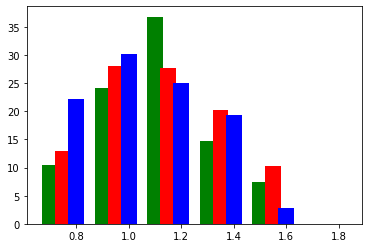

In [ ]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105, 0.]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227, 0.]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

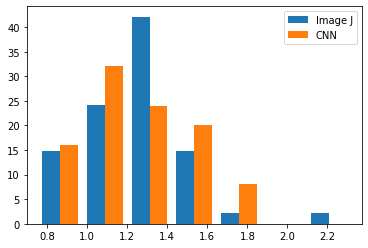

In [ ]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins=7)
plt.legend(['Image J','CNN'])

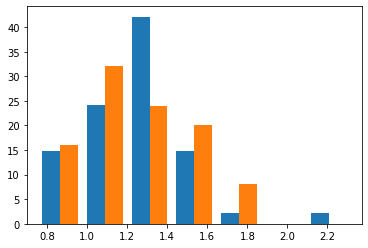

In [ ]:
A = plt.hist(X,weights=wts,bins=7)

In [ ]:
print(A[0][0])

(array([[14.73684211, 24.21052632, 42.10526316, 14.73684211,  2.10526316,
         0.        ,  2.10526316],
       [16.        , 32.        , 24.        , 20.        ,  8.        ,
         0.        ,  0.        ]]), array([0.75356807, 0.97697823, 1.20038839, 1.42379855, 1.64720871,
       1.87061887, 2.09402903, 2.31743919]), <a list of 2 Lists of Patches objects>)


In [ ]:
print(A[0][0])
B = A[0][0]
print(B[6])
print(A[0][1])

[14.73684211 24.21052632 42.10526316 14.73684211  2.10526316  0.
  2.10526316]
2.10526315789474
[16. 32. 24. 20.  8.  0.  0.]


In [ ]:
Novo = []
k = 0
soma = 0
for i in B:
  if(k<4):
    Novo.append(i)
  else:
    soma = soma + i
  k = k + 1
Novo.append(soma)
print(Novo)

[14.736842105263156, 24.2105263157895, 42.1052631578948, 14.736842105263179, 4.21052631578948]


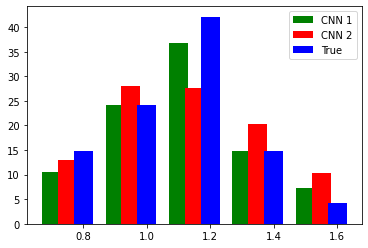

In [ ]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227]
Freq3 = Novo
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])